<a href="https://colab.research.google.com/github/SarunDz-12/229351-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/Copy_of_229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 15:10:44--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 15:10:44 (13.1 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 15:10:44--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [7]:
# TODO: enter code here
import numpy as np
# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = data - np.mean(data, axis=0)
# 2. หา covariance matrix
cov_matrix = np.cov(data_c, rowvar=False)
# 3. Decompose the covariance matrix UDU^T
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
top2_indices = np.argsort(eigenvalues)[-2:]
top2_eigenvectors = eigenvectors[:, top2_indices]
# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
projected_data = data_c @ top2_eigenvectors
# Result: a (50,2) matrix


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [9]:
import numpy as np
from sklearn.decomposition import PCA

# สมมุติว่า data เป็นเมทริกซ์ข้อมูลขนาด (50, 2)
# Center the data manually
data_c = data - np.mean(data, axis=0)

# === วิธีที่ 1: ด้วย np.linalg.eigh ===
cov_matrix = np.cov(data_c, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
top2_indices = np.argsort(eigenvalues)[-2:]
top2_eigenvectors = eigenvectors[:, top2_indices]
projected_manual = data_c @ top2_eigenvectors  # shape (50, 2)

# === วิธีที่ 2: ด้วย PCA จาก scikit-learn ===
pca = PCA(n_components=2)
projected_sklearn = pca.fit_transform(data)

# === เปรียบเทียบผลลัพธ์ ===
# normalize ให้วัดเทียบได้โดยไม่สนใจทิศทาง (บวกลบ)
def normalize_columns(mat):
    norms = np.linalg.norm(mat, axis=0)
    return mat / norms

manual_normed = normalize_columns(projected_manual)
sklearn_normed = normalize_columns(projected_sklearn)

# ตรวจสอบว่าใกล้เคียงกัน (ภายใน tolerance)
are_equal = np.allclose(np.abs(manual_normed), np.abs(sklearn_normed), atol=1e-5)
print("สองวิธีให้ผลลัพธ์เหมือนกัน (ต่างแค่บวกลบ):", are_equal)


สองวิธีให้ผลลัพธ์เหมือนกัน (ต่างแค่บวกลบ): False


In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

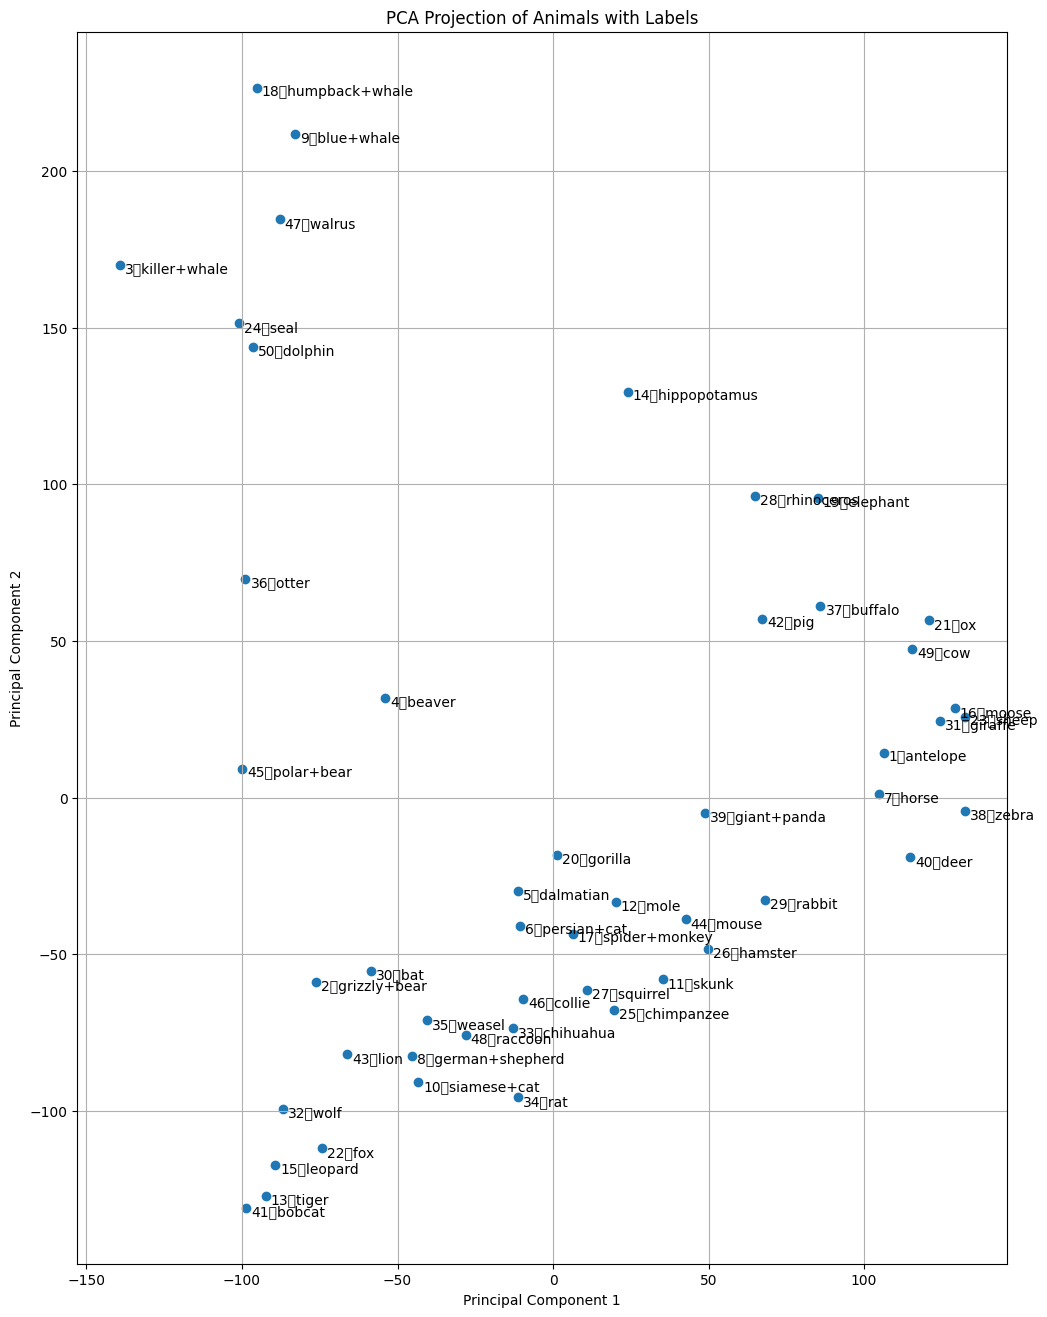

In [14]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(projected_data[:, 0], projected_data[:, 1]) #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(
          classes[i],
          xy=(projected_data[i, 0], projected_data[i, 1]),#TODO: YOUR_MATRIX[i,0],
              #TODO YOUR_MATRIX[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')

plt.title("PCA Projection of Animals with Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น elephant, rhinoceros, hippopotamus, giraffe, moose มีลักษณะที่เหมือนกันคือ เป็น สัตว์กินพืชขนาดใหญ่

2.กลุ่มสัตว์ที่มุมซ้ายบน ตัวอย่างเช่น dolphin, killer+whale, humpback+whale, blue+whale, seal มีลักษณะที่เหมือนกันคือ เป็น สัตว์เลี้ยงลูกด้วยนมที่อาศัยในน้ำ

3.กลุ่มสัตว์ที่มุมล่างขวา ตัวอย่างเช่น hamster, mouse, rat, squirrel, mole มีลักษณะที่เหมือนกันคือ เป็น สัตว์ตัวเล็ก, ส่วนมากอยู่ในกลุ่ม สัตว์ฟันแทะ

4.กลุ่มสัตว์ที่มุมล่างซ้าย ตัวอย่างเช่น lion, tiger, leopard, wolf, bobcat มีลักษณะที่เหมือนกันคือ เป็น สัตว์นักล่า